In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

import requests
from datetime import datetime
import time
from config import weather_api_key

from scipy.stats import linregress

In [62]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [63]:
coordinates = list(lat_lngs)
coordinates

[(42.275357412736895, 112.49650787070794),
 (74.36399971444303, -15.154371793362145),
 (-51.64534117047941, 7.4194436048164505),
 (-13.018961948189897, -156.19291921481573),
 (7.730876267020122, -19.505339115295413),
 (-64.2153001110989, 66.69322183514237),
 (-58.05579605146758, 64.4553206190364),
 (35.00656189232089, -162.04212295124182),
 (-52.022093667897856, -21.120811911288513),
 (60.01792370415754, -162.13023500825574),
 (54.6529422735924, -11.784027172613435),
 (66.3407675890088, 1.7284764658703295),
 (39.19905859198627, 44.2885487785351),
 (-65.13986251070531, 85.9132195529483),
 (86.9766478226972, 48.52320789305128),
 (53.13677831756169, -81.24977959299255),
 (40.69497665841348, 44.494309118250044),
 (-53.76687578273185, 27.789851884299168),
 (84.15237150999849, 73.45876097893154),
 (23.040770343786036, -21.997957624623865),
 (16.482475690880023, -46.388719820982004),
 (-49.68792197230631, 153.60735017134954),
 (-23.824325841582336, 49.91831273365494),
 (50.79692349456781, 92.

In [64]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

611

In [65]:
cities

['jining',
 'illoqqortoormiut',
 'cape town',
 'faanui',
 'bubaque',
 'taolanaro',
 'kapaa',
 'arraial do cabo',
 'bethel',
 'westport',
 'raudeberg',
 'maku',
 'busselton',
 'belushya guba',
 'attawapiskat',
 'shahumyan',
 'port elizabeth',
 'dikson',
 'nouadhibou',
 'sinnamary',
 'hobart',
 'farafangana',
 'shagonar',
 'pemba',
 'ushuaia',
 'portland',
 'hasaki',
 'alexandria',
 'puerto ayora',
 'albany',
 'saldanha',
 'leningradskiy',
 'saint george',
 'camacha',
 'avarua',
 'naberera',
 'saint-pierre',
 'tateyama',
 'haibowan',
 'swellendam',
 'airai',
 'anadyr',
 'noumea',
 'evensk',
 'port alfred',
 'kodiak',
 'punta arenas',
 'nikolskoye',
 'san rafael',
 'hermanus',
 'bengkulu',
 'grindavik',
 'atuona',
 'new norfolk',
 'milton',
 'guerrero negro',
 'rikitea',
 'mataura',
 'esperance',
 'east london',
 'chokurdakh',
 'kaitangata',
 'smithers',
 'brae',
 'nanakuli',
 'clyde river',
 'bluff',
 'elliot',
 'ahipara',
 'kungurtug',
 'thunder bay',
 'inyonga',
 'maracacume',
 'harper

In [66]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7117a2b6c736f7f908b1c52bbc0c0afd


In [67]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7117a2b6c736f7f908b1c52bbc0c0afd&q=Boston


In [68]:
city_weather = requests.get(city_url)

if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
city_weather.json()

City Weather found.


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 21.72,
  'feels_like': 10.4,
  'temp_min': 18.14,
  'temp_max': 24.84,
  'pressure': 1012,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 11.01, 'deg': 345, 'gust': 23},
 'snow': {'1h': 0.89},
 'clouds': {'all': 75},
 'dt': 1643570368,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643543992,
  'sunset': 1643579703},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [69]:
boston_data = city_weather.json()
boston_data['sys']['country']

'US'

In [70]:
date = boston_data['dt']

In [71]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 24.84 51 75 11.01


In [72]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-30 19:19:28'

In [73]:
city_data = []

print("Beginning Data Retrieval")
print("-"*15)

record_count = 1
set_count = 1

for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(6)

    city_url = url + "&q=" + city.replace(" ","+")

    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass


print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | jining
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | bubaque
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | westport
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | maku
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | shahumyan
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | nouadhibou
Processing Record 20 of Set 1 | sinnamary
Processing Rec

Processing Record 37 of Set 4 | jiazi
Processing Record 38 of Set 4 | taltal
Processing Record 39 of Set 4 | florianopolis
Processing Record 40 of Set 4 | bud
Processing Record 41 of Set 4 | sao filipe
Processing Record 42 of Set 4 | mogoytuy
Processing Record 43 of Set 4 | atambua
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | berea
Processing Record 46 of Set 4 | lichinga
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | bilma
Processing Record 50 of Set 4 | bilibino
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | xacmaz
Processing Record 4 of Set 5 | sagaing
Processing Record 5 of Set 5 | skjervoy
Processing Record 6 of Set 5 | ecuandureo
Processing Record 7 of Set 5 | torres vedras
Processing Record 8 of Set 5 | nacala
Processing Record 9 of Set 5 | asfi
Processing Record 10 of Set 5 | petropavlovsk-kamchatskiy
Proc

Processing Record 27 of Set 8 | marcona
City not found. Skipping...
Processing Record 28 of Set 8 | cucuyagua
Processing Record 29 of Set 8 | angoram
Processing Record 30 of Set 8 | constitucion
Processing Record 31 of Set 8 | plettenberg bay
Processing Record 32 of Set 8 | morondava
Processing Record 33 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 34 of Set 8 | russell
Processing Record 35 of Set 8 | oussouye
Processing Record 36 of Set 8 | la union
Processing Record 37 of Set 8 | phan rang
City not found. Skipping...
Processing Record 38 of Set 8 | pangody
Processing Record 39 of Set 8 | solnechnyy
Processing Record 40 of Set 8 | utiroa
City not found. Skipping...
Processing Record 41 of Set 8 | savannah bight
Processing Record 42 of Set 8 | shakawe
Processing Record 43 of Set 8 | canon city
Processing Record 44 of Set 8 | oksfjord
Processing Record 45 of Set 8 | masterton
Processing Record 46 of Set 8 | abu kamal
Processing Record 47 of Set 8 | taoudenni
Pro

Processing Record 15 of Set 12 | chissamba
Processing Record 16 of Set 12 | obuasi
Processing Record 17 of Set 12 | ilulissat
Processing Record 18 of Set 12 | kiunga
Processing Record 19 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 20 of Set 12 | naga
Processing Record 21 of Set 12 | batagay
Processing Record 22 of Set 12 | magadi
Processing Record 23 of Set 12 | zhigansk
Processing Record 24 of Set 12 | timra
Processing Record 25 of Set 12 | tessalit
Processing Record 26 of Set 12 | akyab
Processing Record 27 of Set 12 | batsfjord
Processing Record 28 of Set 12 | samarai
Processing Record 29 of Set 12 | sibolga
Processing Record 30 of Set 12 | podor
Processing Record 31 of Set 12 | eureka
Processing Record 32 of Set 12 | canaries
Processing Record 33 of Set 12 | homer
Processing Record 34 of Set 12 | saint anthony
Processing Record 35 of Set 12 | nhulunbuy
Processing Record 36 of Set 12 | umm lajj
Processing Record 37 of Set 12 | leh
Processing Record 38 of Set 

In [74]:
city_data

[{'City': 'Jining',
  'Lat': 35.405,
  'Lng': 116.5814,
  'Max Temp': 37.99,
  'Humidity': 1,
  'Cloudiness': 80,
  'Wind Speed': 8.25,
  'Country': 'CN',
  'Date': '2022-01-30 19:24:13'},
 {'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 70.11,
  'Humidity': 83,
  'Cloudiness': 0,
  'Wind Speed': 7,
  'Country': 'ZA',
  'Date': '2022-01-30 19:23:54'},
 {'City': 'Faanui',
  'Lat': -16.4833,
  'Lng': -151.75,
  'Max Temp': 80.13,
  'Humidity': 72,
  'Cloudiness': 44,
  'Wind Speed': 7.36,
  'Country': 'PF',
  'Date': '2022-01-30 19:22:20'},
 {'City': 'Bubaque',
  'Lat': 11.2833,
  'Lng': -15.8333,
  'Max Temp': 78.1,
  'Humidity': 65,
  'Cloudiness': 13,
  'Wind Speed': 15.17,
  'Country': 'GW',
  'Date': '2022-01-30 19:22:24'},
 {'City': 'Kapaa',
  'Lat': 22.0752,
  'Lng': -159.319,
  'Max Temp': 75.11,
  'Humidity': 70,
  'Cloudiness': 20,
  'Wind Speed': 1.99,
  'Country': 'US',
  'Date': '2022-01-30 19:24:16'},
 {'City': 'Arraial Do Cabo',
  'Lat': -22.9661,


In [75]:
len(city_data)

562

In [76]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jining,35.4050,116.5814,37.99,1,80,8.25,CN,2022-01-30 19:24:13
1,Cape Town,-33.9258,18.4232,70.11,83,0,7.00,ZA,2022-01-30 19:23:54
2,Faanui,-16.4833,-151.7500,80.13,72,44,7.36,PF,2022-01-30 19:22:20
3,Bubaque,11.2833,-15.8333,78.10,65,13,15.17,GW,2022-01-30 19:22:24
4,Kapaa,22.0752,-159.3190,75.11,70,20,1.99,US,2022-01-30 19:24:16
5,Arraial Do Cabo,-22.9661,-42.0278,85.96,70,40,11.50,BR,2022-01-30 19:24:16
6,Bethel,41.3712,-73.4140,26.10,46,0,1.99,US,2022-01-30 19:24:17
7,Westport,41.1415,-73.3579,27.90,43,0,1.99,US,2022-01-30 19:24:17
8,Raudeberg,61.9875,5.1352,33.40,77,99,3.00,NO,2022-01-30 19:21:25
9,Maku,39.2911,44.4521,29.01,59,40,4.61,IR,2022-01-30 19:24:17


In [77]:
#Create cities.csv File
output_file = "weather_data/cities.csv"
city_data_df.to_csv(output_file, index_label="City_ID")

In [78]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

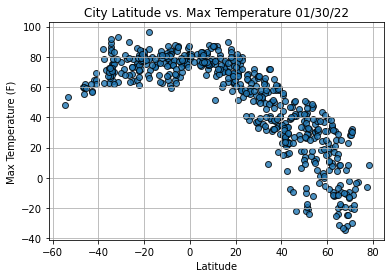

In [79]:
#City Latitude vs. Max Temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

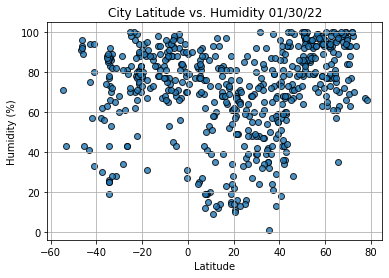

In [80]:
#City Latitude vs. Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

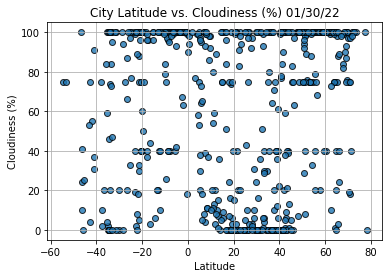

In [81]:
#City Latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")


plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

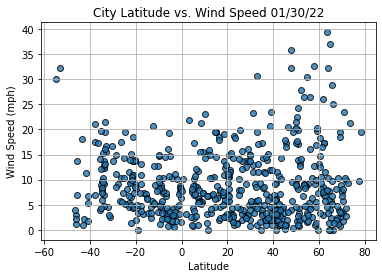

In [82]:
#City Latitude vs. Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [83]:
linregress(lats,max_temps)

LinregressResult(slope=-0.7222937270223176, intercept=65.61749927870034, rvalue=-0.7842265793480183, pvalue=3.61538485366471e-118, stderr=0.024149172164502408, intercept_stderr=0.9268797191637695)

In [84]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [85]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jining,35.4050,116.5814,37.99,1,80,8.25,CN,2022-01-30 19:24:13
3,Bubaque,11.2833,-15.8333,78.10,65,13,15.17,GW,2022-01-30 19:22:24
4,Kapaa,22.0752,-159.3190,75.11,70,20,1.99,US,2022-01-30 19:24:16
6,Bethel,41.3712,-73.4140,26.10,46,0,1.99,US,2022-01-30 19:24:17
7,Westport,41.1415,-73.3579,27.90,43,0,1.99,US,2022-01-30 19:24:17
...,...,...,...,...,...,...,...,...,...
556,Mana,5.6592,-53.7767,81.32,70,73,10.76,GF,2022-01-30 19:32:55
557,Calatayud,41.3535,-1.6432,50.58,36,0,3.15,ES,2022-01-30 19:32:55
558,Atar,20.5169,-13.0499,82.06,10,100,6.82,MR,2022-01-30 19:32:56
559,Marabba,12.3500,32.1833,72.27,13,8,14.83,SD,2022-01-30 19:32:57


In [86]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

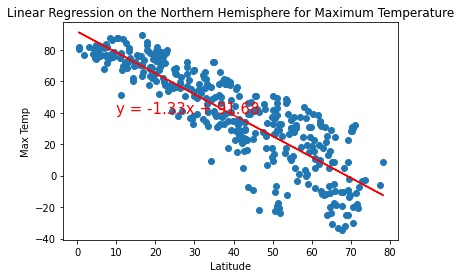

In [87]:
#Northern Max Temp linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))

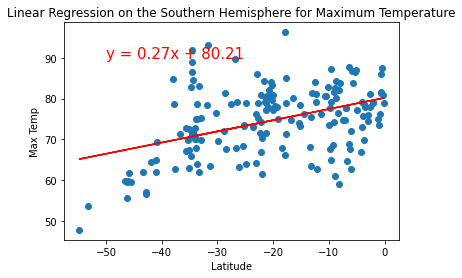

In [88]:
#Southern Max Temp linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

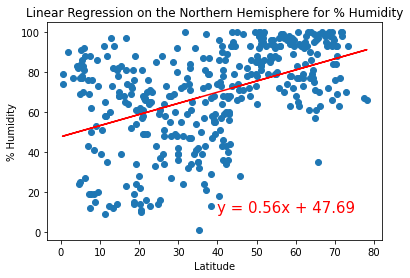

In [89]:
#Northern Humidity linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,10))

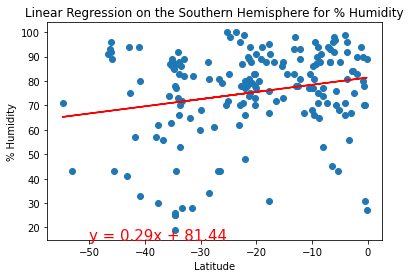

In [90]:
#Southern Humidity linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

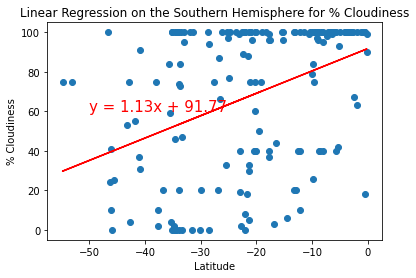

In [91]:
#Southern Cloudiness linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

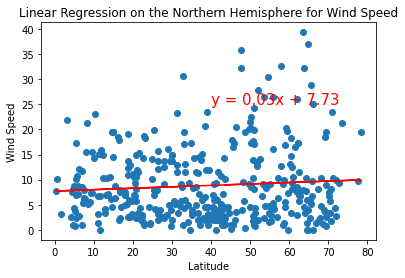

In [92]:
#Northern Wind Speed linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,25))

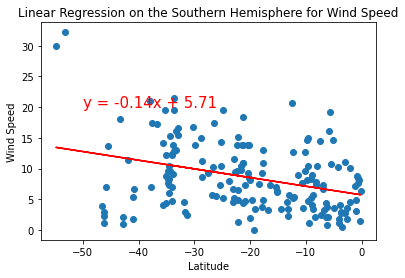

In [93]:
#Southern Wind Speed linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,20))